# Kaggle Competition:  Iceberg or Ship

## Notebook 3
## run resnext50 architecture

In [1]:
!ls -l

total 1756
-rw-rw-r-- 1 nidhin nidhin 623462 Jan 13 22:48 1_getdata.ipynb
-rw-rw-r-- 1 nidhin nidhin 245619 Jan 13 21:50 2_model_resnet34.ipynb
-rw-rw-r-- 1 nidhin nidhin  13184 Jan 13 23:37 3_model_resnext50.ipynb
-rw-rw-r-- 1 nidhin nidhin   6048 Jan 14 00:02 4_resnext_resize.ipynb
-rw-rw-r-- 1 nidhin nidhin 137540 Jan 13 21:44 baseline.ipynb
-rw-rw-r-- 1 nidhin nidhin    536 Jan 13 19:15 helper.py
-rw-rw-r-- 1 nidhin nidhin 747405 Jan 13 22:32 other_groverpr.ipynb
drwxrwxr-x 2 nidhin nidhin   4096 Jan 13 19:15 __pycache__
-rw-rw-r-- 1 nidhin nidhin    185 Jan 13 17:48 README.md


In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np
import shutil
from IPython.display import FileLink, FileLinks

from sklearn.model_selection import train_test_split
import helper

In [5]:
#PATH = "/home/nidhin/data/iceberg/"
PATH = os.path.expanduser("~/data/iceberg/")

In [6]:
!ls -l {PATH}

total 1975500
drwxrwxr-x  6 nidhin nidhin       4096 Jan 13 21:37 composites
drwxrwxr-x  2 nidhin nidhin       4096 Jan 13 19:06 models
-rw-rw-r--  1 nidhin nidhin     117951 Oct 23 17:27 sample_submission.csv
-rw-rw-r--  1 nidhin nidhin      38566 Jan  7 20:28 sample_submission.csv.7z
drwxrwxr-x  3 nidhin nidhin       4096 Jan 13 21:20 sub
drwxrwxr-x  2 nidhin nidhin     286720 Jan 13 22:48 test
-rw-rw-r--  1 nidhin nidhin 1521771850 Oct 23 17:27 test.json
-rw-rw-r--  1 nidhin nidhin  257127394 Jan  7 20:28 test.json.7z
drwxrwxr-x 15 nidhin nidhin       4096 Jan 13 21:50 tmp
drwxrwxr-x  4 nidhin nidhin       4096 Jan 13 22:48 train
-rw-rw-r--  1 nidhin nidhin  196313674 Oct 23 17:23 train.json
-rw-rw-r--  1 nidhin nidhin   44932785 Jan  7 20:28 train.json.7z
-rw-rw-r--  1 nidhin nidhin    2275916 Jan  8 01:44 train_modified.zip
drwxrwxr-x  4 nidhin nidhin       4096 Jan 13 22:48 valid


In [43]:
np.random.seed(0)

In [44]:
sz=75
#arch=resnext50
arch=resnet18
bs=32
lr = 1e-2

In [45]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test',)
data = data.resize(int(sz*1.3), 'tmp')
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [46]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 24%|██▍       | 10/41 [00:00<00:00, 34.20it/s, loss=6.58] 


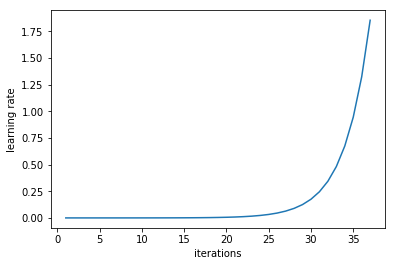

In [47]:
learn.sched.plot_lr()

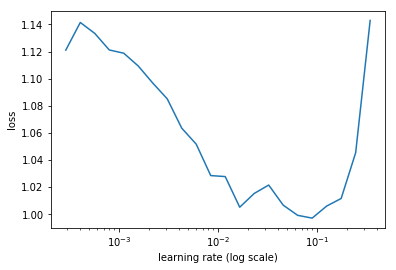

In [48]:
learn.sched.plot() 

In [50]:
learn.fit(lr, 8)
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

[ 0.       0.74729  0.55952  0.66193]                      
[ 1.       0.66326  0.50032  0.79261]                      
[ 2.       0.64766  0.59095  0.64773]                      
[ 3.       0.63932  0.51294  0.76704]                      
[ 4.       0.62515  0.52346  0.69602]                     
[ 5.       0.6392   0.54949  0.74148]                      
[ 6.       0.59203  0.53264  0.69318]                      
[ 7.       0.55984  0.5024   0.77273]                      



In [51]:
learn.fit(lr, 4, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

[ 0.       0.58331  0.50234  0.72159]                      
[ 1.       0.55796  0.47582  0.76704]                      
[ 2.       0.55608  0.47539  0.78125]                      
[ 3.       0.55618  0.46742  0.78977]                      
[ 4.       0.56283  0.49922  0.75284]                      
[ 5.       0.54766  0.50126  0.68466]                      
[ 6.       0.51581  0.46939  0.76704]                      
[ 7.       0.52282  0.46142  0.78409]                      



In [53]:
lr/10

0.001

In [36]:
lr/9

0.0011111111111111111

In [38]:
lr/3

0.0033333333333333335

In [39]:
lr/4

0.0025

In [54]:
learn.unfreeze()
lrs = np.array([lr/15,lr/12,lr/9])
wd = 0.025
wds=[wd/100, wd/10, wd]
wds=[0.0025,0.025,0.25]


In [58]:
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2,use_wd_sched=True,wds=wds)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[ 0.       0.66874  0.69314  0.53409]                      
[ 1.       0.68564  0.69307  0.53409]                      
[ 2.       0.69023  0.69315  0.53409]                      
[ 3.       0.69185  0.69302  0.53409]                      
[ 4.       0.69251  0.69312  0.53409]                      
[ 5.       0.69286  0.69312  0.53409]                      
[ 6.       0.69301  0.69315  0.53409]                      
[ 7.       0.69304  0.69305  0.53409]                      
[ 8.       0.69299  0.69297  0.53409]                      
[ 9.       0.693    0.69308  0.53409]                      
[ 10.        0.69306   0.69312   0.53409]                  
[ 11.        0.69309   0.6931    0.53409]                  
[ 12.        0.69311   0.69314   0.53409]                  
[ 13.        0.69313   0.69314   0.53409]                  
[ 14.        0.69314   0.69315   0.53409]                  
[ 15.        0.6931    0.69309   0.53409]                  
[ 16.        0.69308   0.693     0.53409

In [30]:
learn.save('224_all_50')

In [31]:
learn.load('224_all_50')

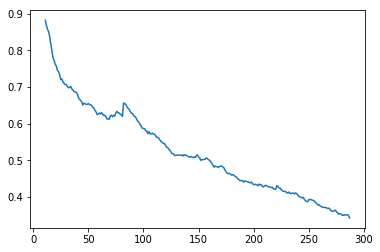

In [32]:
learn.sched.plot_loss()

In [56]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.37887625457759588, 0.84735202492211836)

In [ ]:
test_df = pd.read_json(PATH+"/test.json")
helper.make_test_file(log_preds,test_df,model_name='resnext50_sz75_13_bs20_comp_band',
                      classes=data.classes,
                      submission_folder =f'{PATH}sub'
                     )